In [1]:
# importing warning libraries to prevent from errors
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries for data loading and inspection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing necessary libraries for model building
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import graphviz, pydotplus

In [4]:
# Loading the data into dataframe
housing_dataframe = pd.read_csv(r'Housing.csv')

In [5]:
# reading the data
housing_dataframe.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [6]:
# checking the shape of the dataframe
housing_dataframe.shape

(545, 13)

In [7]:
# checking the info of the dataframe
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Feature Modifications

In [8]:
# checking the datafarme again
housing_dataframe.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [9]:
# converting yes and nos into 1's and 0's
feature_convert_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in feature_convert_list:
    housing_dataframe.loc[housing_dataframe[i] == 'yes', i] = 1
    housing_dataframe.loc[housing_dataframe[i] == 'no', i] = 0

In [10]:
# crearing dummy variables for funrnishing status
furnishing_dummies = pd.get_dummies(housing_dataframe['furnishingstatus'], drop_first= True)

In [11]:
# adding into the main dataframe and dropping the original column
housing_dataframe = pd.concat([housing_dataframe, furnishing_dummies], axis = 1)

In [12]:
# dropping the original column from which the dummies have been created
housing_dataframe.drop('furnishingstatus', axis = 1, inplace = True)

In [13]:
# analyzing the final dataframe after all modifications
housing_dataframe.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3        1         0        0   
1  12250000  8960         4          4        4        1         0        0   
2  12250000  9960         3          2        2        1         0        1   
3  12215000  7500         4          2        2        1         0        1   
4  11410000  7420         4          1        2        1         1        1   

  hotwaterheating airconditioning  parking prefarea  semi-furnished  \
0               0               1        2        1               0   
1               0               1        3        0               0   
2               0               0        2        1               1   
3               0               1        3        1               0   
4               0               1        2        0               0   

   unfurnished  
0            0  
1            0  
2            0  
3            0  
4            0

### Model Building

In [14]:
# Train Test split of the data
df_train, df_test = train_test_split(housing_dataframe, train_size = 0.70, test_size = 0.30, random_state = 100)

In [15]:
# checking the shapes of the train and test
df_train.shape, df_test.shape

((381, 14), (164, 14))

In [16]:
# Creating X and y variables from the train and test sets
y_train = df_train.pop('price')
X_train = df_train
y_test  = df_test.pop('price')
X_test  = df_test

In [17]:
# analyzing X_train
X_train.head()

area  bedrooms  bathrooms  stories mainroad guestroom basement  \
359  3600         3          1        1        1         0        0   
19   6420         3          2        2        1         0        0   
159  3150         3          2        1        1         1        1   
35   7000         3          2        4        1         0        0   
28   7950         5          2        2        1         0        1   

    hotwaterheating airconditioning  parking prefarea  semi-furnished  \
359               0               0        1        0               0   
19                0               1        1        1               1   
159               0               1        0        0               0   
35                0               1        2        0               0   
28                1               0        2        0               0   

     unfurnished  
359            1  
19             0  
159            0  
35             0  
28             1

In [18]:
# analyzing y_train
y_train.head()

359    3710000
19     8855000
159    5460000
35     8080940
28     8400000
Name: price, dtype: int64

- One of the benifit of decision trees is that we no need to perform any data preprocessing like missing values treatments, outlier analysis, multicollinearity removal of variables, feature scaling. We can directly use the data in its state when performing modelling.
- For better intreperability we can scale the y_train and y_test but let's try building the model using the data in its original scale values.

In [19]:
# Before building the model let's create some helper functions
def dt_graph(dt_regressor):
    dot_data = StringIO()
    export_graphviz(dt_regressor, out_file = dot_data, filled = True, rounded = True, feature_names= X_train.columns)
    graph =  pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [20]:
# creating helper function for estimating the performance of the model on train and test data
def performance_estimation(dt_regressor):
    y_train_pred = dt_regressor.predict(X_train)
    y_test_pred = dt_regressor.predict(X_test)
    print('performance of the model on the train data')
    print(r2_score(y_train, y_train_pred))
    print('-'*50)
    print('performance of the model on the test data')
    print(r2_score(y_test, y_test_pred))

In [21]:
# building the model using default parameters
dt_default = DecisionTreeRegressor(random_state = 100)

In [22]:
# fitting the data on top of the model
dt_default.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [23]:
# building the graph of the decision tree
dt_default_graph  = dt_graph(dt_default)
Image(dt_default_graph.create_png())

- Since we have constructed the tree with its default parameters the tree has extended to its final logical end and the tree has overfitted on the train set.

In [24]:
# checking the performance of the model
performance_estimation(dt_default)

performance of the model on the train data
0.9984486155583219
--------------------------------------------------
performance of the model on the test data
0.28848201851686106


- From the above results we can see that the model has performed extremely well on the train dataset but terribly failed to perform on unseen dataset. Hence the model is an high variance model meaning small variation in the data will result in drastic change in tree structure and predictions made by the tree. In order to overcome high variance or overfitting issue we need to tune the hyper parameters and then build the model using those tuned hyper parameters. Upon building the model using tuned hyper parameters we are performing tree truncation which is one of the technique to overcome overfitting issues in decision trees. Using GridSerachCV we tune the hyper parameters which basically uses cross validation technique in tuning the hyper parameters.

- Before building model by hyper parameter tuning let's build a model with some random hyper parameters to get some sence how the model is performing and making predictions.

In [25]:
# buliding a random model
dt_random = DecisionTreeRegressor(random_state= 100, max_depth = 5, min_samples_leaf= 20)

In [26]:
# fitting the data on top of the model object
dt_random.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

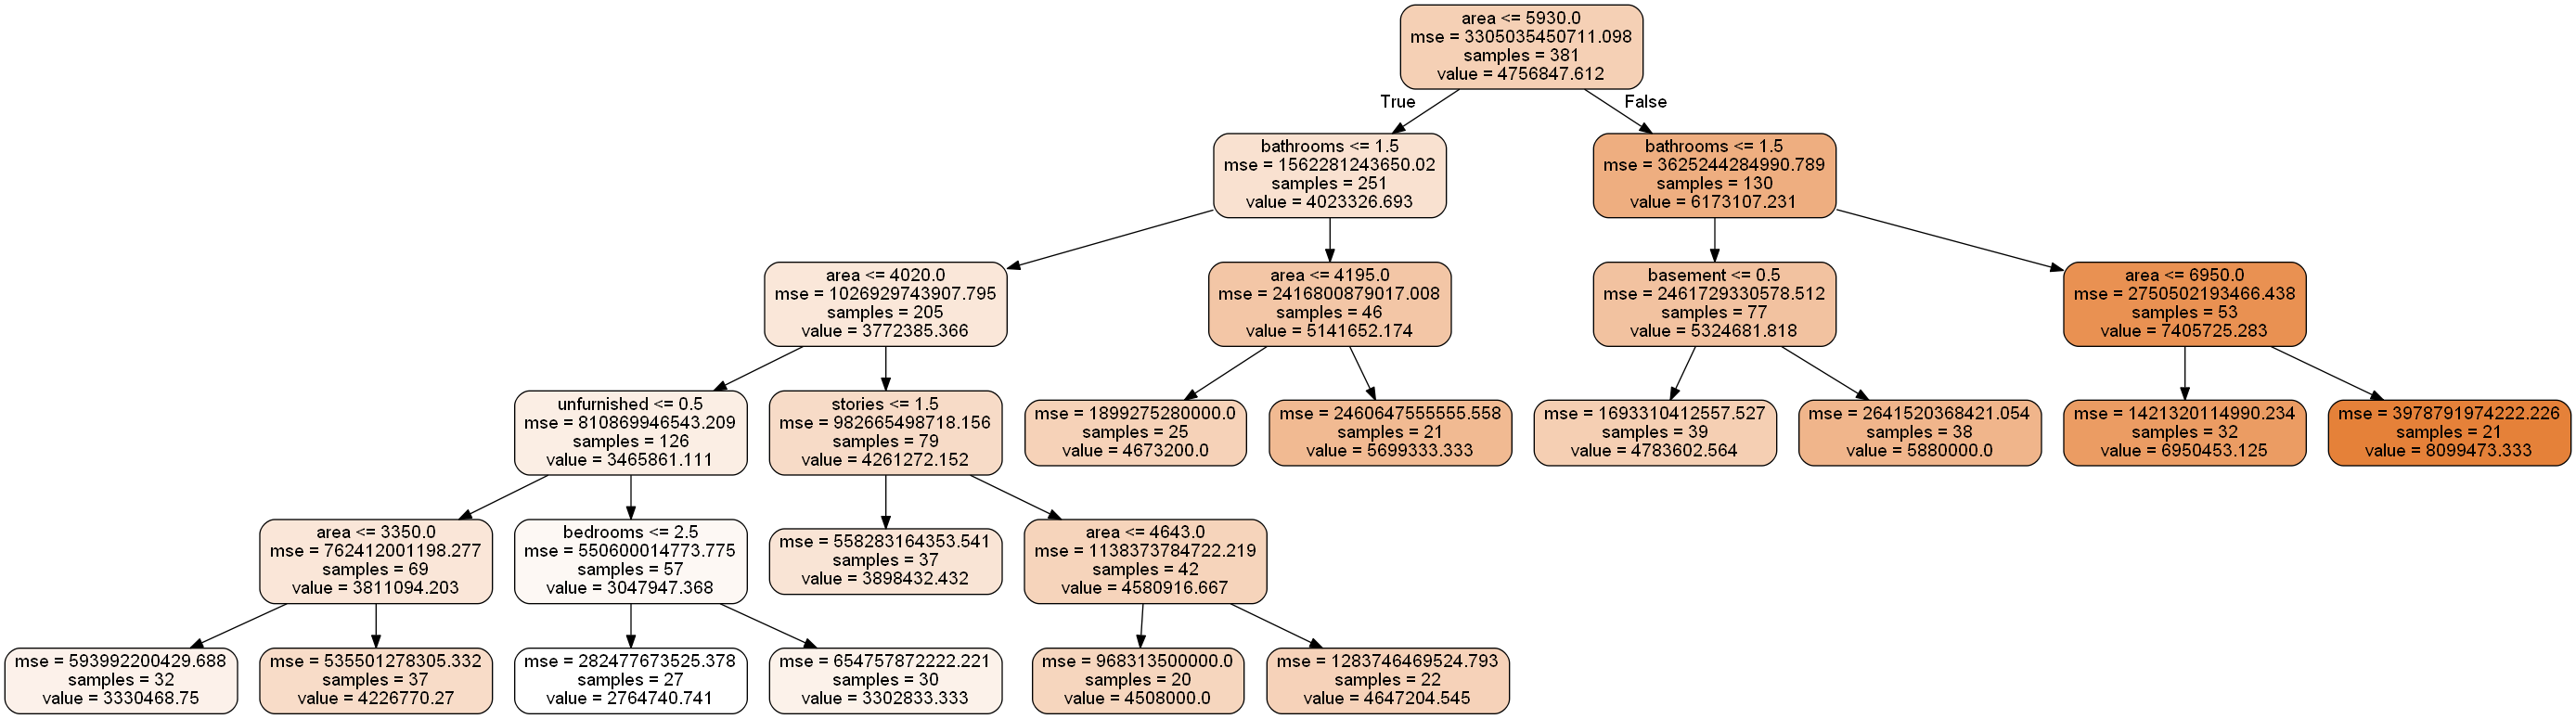

In [27]:
# creating the graph of the decision tree
graph_random  = dt_graph(dt_random)
Image(graph_random.create_png())

In [28]:
# checking the performance of the random model
performance_estimation(dt_random)

performance of the model on the train data
0.5799256971327839
--------------------------------------------------
performance of the model on the test data
0.49284284357295827


In [29]:
# defining the model object for hyper parameter tuning
dt_tune = DecisionTreeRegressor(random_state = 100)

In [30]:
# buidling the model by hyper parameter tuning
params = {'max_depth': [2,3,4,5,6,7,8,9,10],
          'min_samples_split': [20,30,40,50,60,70,80,100], 
          'min_samples_leaf': [20,30,40,50,60,70,80,90,100] }

In [31]:
# definig the GridSearchCV object
grid_search = GridSearchCV(estimator= dt_tune,
                           n_jobs = -1, verbose = 1,
                           param_grid= params, cv = 4)

In [32]:
# fitting the data on top of the grid object
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2029 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:   14.0s finished
C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [20, 30, 40, 50, 60, 70, 80, 100], 'min_samples_leaf': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
# checking the results of the gridsearchcv method
grid_search.cv_results_

{'mean_fit_time': array([0.00523621, 0.00423813, 0.00523543, 0.00523573, 0.00623417,
        0.00498748, 0.00498688, 0.00523603, 0.00523585, 0.00673068,
        0.00448751, 0.00423884, 0.00448793, 0.00623351, 0.00448811,
        0.00423867, 0.00423902, 0.00673211, 0.00523609, 0.00548488,
        0.01072156, 0.01171845, 0.00747991, 0.0054853 , 0.00947469,
        0.00623351, 0.00698155, 0.00573456, 0.00698179, 0.00623333,
        0.00523621, 0.0042389 , 0.01022285, 0.00448781, 0.00473768,
        0.0057348 , 0.00498652, 0.00398934, 0.00598359, 0.00548536,
        0.00473702, 0.00698149, 0.00523609, 0.00448877, 0.00423902,
        0.00373983, 0.00398964, 0.00423974, 0.00448835, 0.00473732,
        0.00448877, 0.00423795, 0.00373989, 0.00523549, 0.00523591,
        0.00598425, 0.00448799, 0.00598437, 0.00723016, 0.0072301 ,
        0.00473696, 0.00573409, 0.00498641, 0.0062331 , 0.00523639,
        0.00673187, 0.00573456, 0.00473678, 0.00373995, 0.00498641,
        0.00324112, 0.00448817,

In [34]:
# can be better understood in dataframe for the results
grid_dataframe = pd.DataFrame(grid_search.cv_results_)

In [35]:
# sorting the dataframe in terms of mean_test_score
grid_dataframe.sort_values(by = 'mean_test_score', ascending = False, inplace = True)

In [36]:
# checking the dataframe
grid_dataframe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
144       0.008228      0.006778         0.001995    7.974558e-07   
145       0.005735      0.001915         0.002743    1.295537e-03   
146       0.005236      0.001635         0.001746    4.319834e-04   
290       0.004488      0.000499         0.001995    3.371748e-07   
506       0.006234      0.002159         0.001994    1.072884e-06   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
144               4                     20                      20   
145               4                     20                      30   
146               4                     20                      40   
290               6                     20                      40   
506               9                     20                      40   

                                                params  split0_test_score  \
144  {'max_depth': 4, 'min_samples_leaf': 20, 'min_...           0.540781   
145  {'max_depth': 4, 'min_samples_leaf': 20, 'min_...           0.540781   
146  {'max_depth': 4, 'min_samples_leaf': 20, 'min_...           0.540781   
290  {'max_depth': 6, 'min_samples_leaf': 20, 'min_...           0.536267   
506  {'max_depth': 9, 'min_samples_leaf': 20, 'min_...           0.536267   

     split1_test_score  ...  split3_test_score  mean_test_score  \
144           0.477393  ...           0.376522         0.472780   
145           0.477393  ...           0.376522         0.472780   
146           0.477393  ...           0.376522         0.472780   
290           0.486511  ...           0.376522         0.472303   
506           0.486511  ...           0.376522         0.472303   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
144        0.060099                1            0.551130            0.575010   
145        0.060099                1            0.551130            0.575010   
146        0.060099                1            0.551130            0.575010   
290        0.058653                4            0.552645            0.588912   
506        0.058653                4            0.552645            0.588912   

     split2_train_score  split3_train_score  mean_train_score  std_train_score  
144            0.547003            0.589084          0.565557         0.017287  
145            0.547003            0.589084          0.565557         0.017287  
146            0.547003            0.589084          0.565557         0.017287  
290            0.552339            0.589084          0.570745         0.018253  
506            0.552339            0.589084          0.570745         0.018253  

[5 rows x 21 columns]

In [37]:
# checking for the best estimator tree
dt_grid_best = grid_search.best_estimator_
dt_grid_best

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

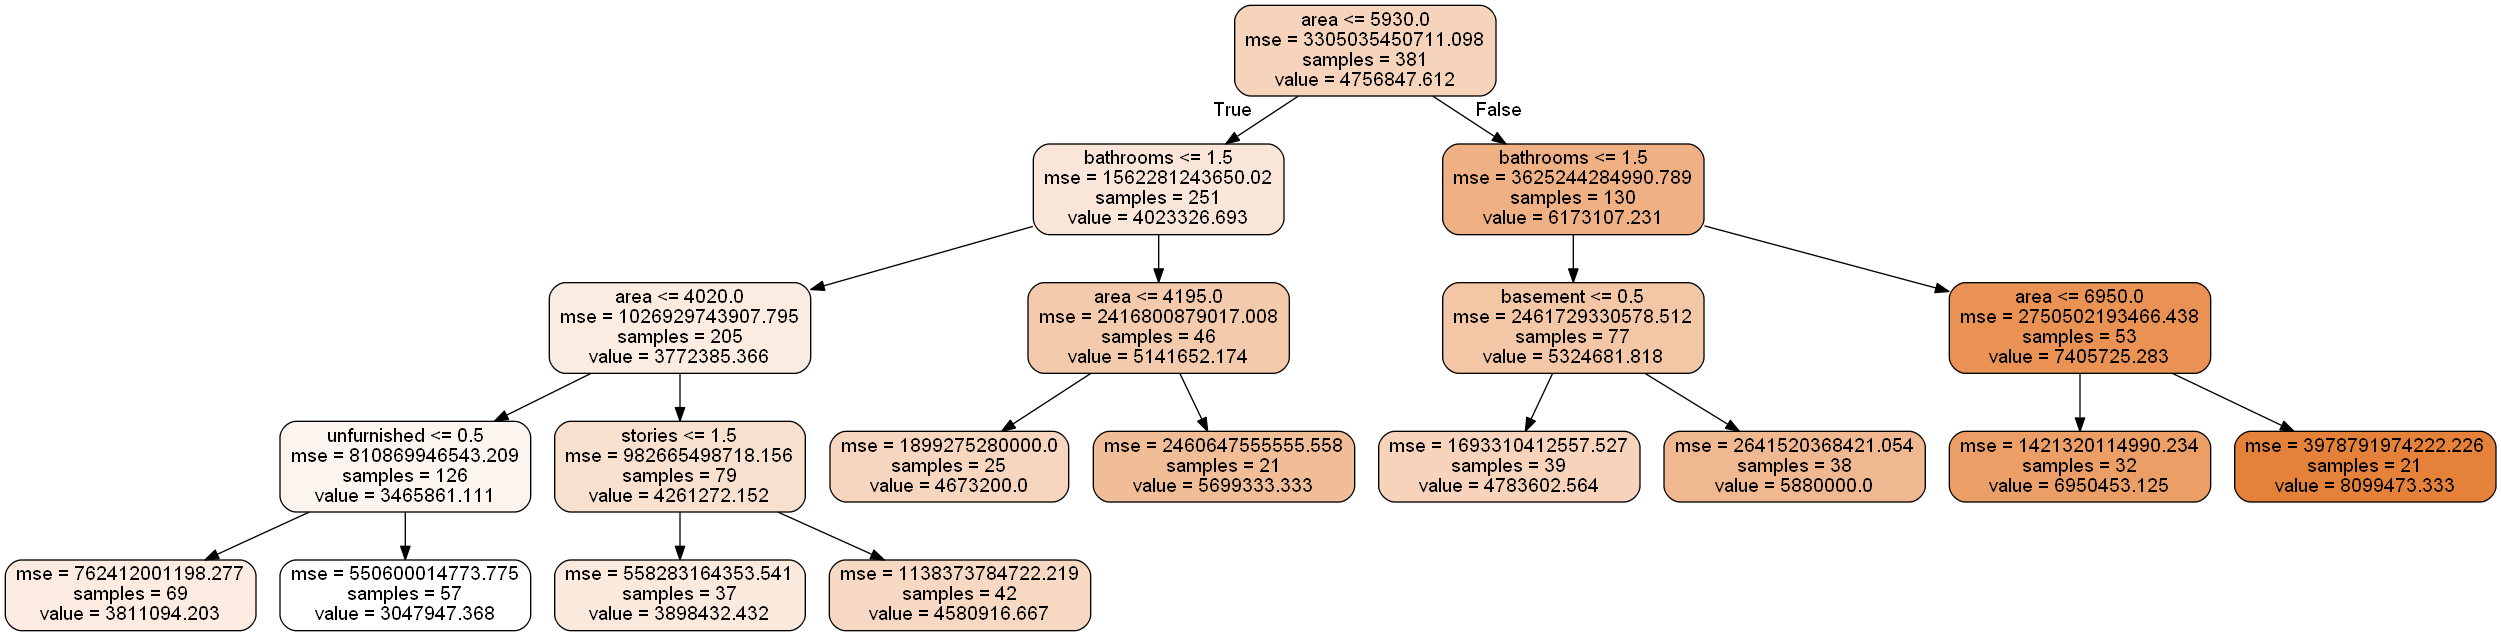

In [38]:
# plotting the graph of the decision tree
graph_grid_best = dt_graph(dt_grid_best)
Image(graph_grid_best.create_png())

In [39]:
# checking the performance of the model
performance_estimation(dt_grid_best)

performance of the model on the train data
0.5655495547920747
--------------------------------------------------
performance of the model on the test data
0.5066637909807893


In [40]:
# checking the feature importance of the features in the best combinations of hyperparameters dt
dt_grid_best.feature_importances_

array([0.63930544, 0.        , 0.28981395, 0.01286582, 0.        ,
       0.        , 0.03248791, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02552689])

In [42]:
# The feature importance can be better understood in dataframe
feature_imp_dataframe = pd.DataFrame()
feature_imp_dataframe['Features'] = X_train.columns
feature_imp_dataframe['Importance values'] = dt_grid_best.feature_importances_
feature_imp_dataframe.sort_values(by = 'Importance values', ascending= False, inplace = True)
feature_imp_dataframe

Features  Importance values
0              area           0.639305
2         bathrooms           0.289814
6          basement           0.032488
12      unfurnished           0.025527
3           stories           0.012866
1          bedrooms           0.000000
4          mainroad           0.000000
5         guestroom           0.000000
7   hotwaterheating           0.000000
8   airconditioning           0.000000
9           parking           0.000000
10         prefarea           0.000000
11   semi-furnished           0.000000

__Feature Importance__:
- Using decision tree we can get to know about feature importance of the features which determines how important is a particular feature in making predictions about the class of the predictor variable. Though we will not be knowing about the linear relationalship between the feature and the target variable and also its directional effect on target variable upon increasing a particular feature by one unit keeping all other features constant. If such interpretation is needed then we need to opt for linear model building. The feature importance is calculated by considering the sum of how much gini reduction or the pruity gain caused by a particular feature upon splitting a node. For every variable like such the feature importance is calculated. If a particular feature doesnot help in any of the node splitting then that particular feature will have 0 feature importance value. In order to normalize it we divide by the number of samples present at the node so that sum of all feature importances adds to 1. Which will help in better comparison of the features. Since here we are performing Decision Tree Regression task the feature importance is calculated considering the difference in variance created by a feature upon splitting a node.